<a href="https://colab.research.google.com/github/Avishek2020/ImageClassification/blob/main/Fashion_Data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
# Load the fashion-mnist pre-shuffled train data and test data tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


### Visualize the data

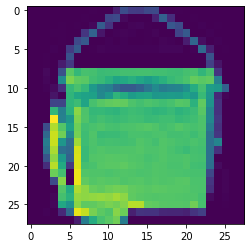

In [ ]:
# Show one of the images from the training dataset
# plt.imshow(x_train[img_index])
plt.imshow(x_train[991])

In [ ]:
x_train = x_train.reshape((60000,28,28, 1))
x_test = x_test.reshape((10000,28,28, 1))

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

**Training data** — used for training the model

**Validation data** — used for tuning the hyperparameters and evaluate the models

**Test data** — used to test the model after the model has gone through initial vetting by the validation set.

```
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
```

In [ ]:
from sklearn.model_selection import train_test_split
# # split into train test sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

#x_valid, x_train = x_train[:5000], x_train[5000:]
#y_valid, y_train = y_train[:5000], y_train[5000:]



### Model

In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2) , padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

### Second simple model

In [ ]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 300)               1622700   
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                      

### Compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Train the model

In [ ]:
model_history= model.fit(x_train,
                        y_train,
                        batch_size=64,
                        epochs=4,
                        validation_data=(x_valid, y_valid) )

Epoch 1/4
860/860 [==============================] - 71s 81ms/step - loss: 1.3193 - accuracy: 0.4970 - val_loss: 0.8172 - val_accuracy: 0.7034
Epoch 2/4
860/860 [==============================] - 70s 81ms/step - loss: 0.8869 - accuracy: 0.6548 - val_loss: 0.7250 - val_accuracy: 0.7218
Epoch 3/4
860/860 [==============================] - 70s 81ms/step - loss: 0.7980 - accuracy: 0.6916 - val_loss: 0.6649 - val_accuracy: 0.7446
Epoch 4/4
860/860 [==============================] - 69s 81ms/step - loss: 0.7430 - accuracy: 0.7143 - val_loss: 0.6189 - val_accuracy: 0.7780


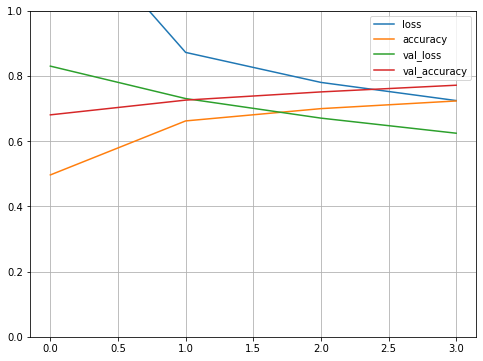

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Test Accuracy

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7698000073432922


In [ ]:
x_new = x_test[:10]
x_new

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [ ]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

9


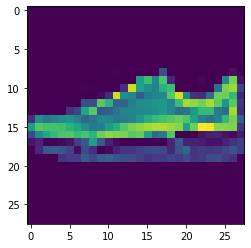

2


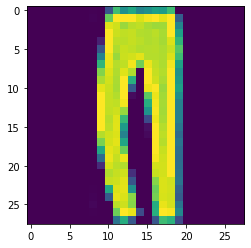

1


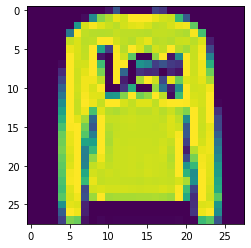

1


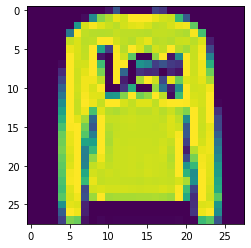

6


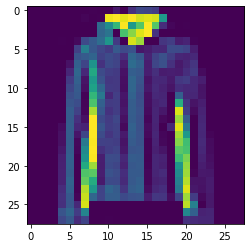

1


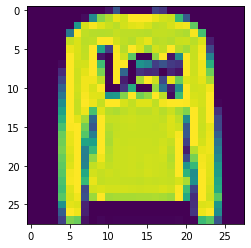

6


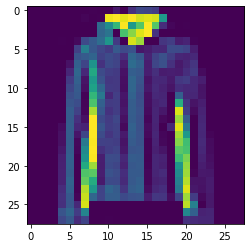

6


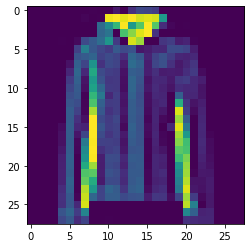

5


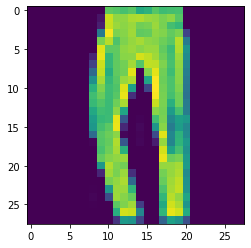

7


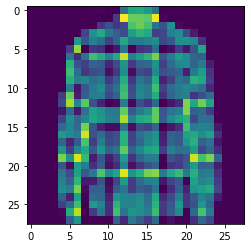

In [ ]:
for i in y_pred:
    print(i)
    plt.imshow(x_test[i].reshape((28,28)))
    plt.show()

##### How To Solve Keras AttributeError: ‘Sequential’ object has no attribute ‘predict_classes’ Error ?
- https://exerror.com/keras-attributeerror-sequential-object-has-no-attribute-predict_classes/
- https://github.com/keras-team/keras/issues/15838- https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html